<a href="https://colab.research.google.com/github/skywalker290/Misleading-Video-Detection-Model/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Data

1. Convert Different Language Comments into English

In [1]:
# https://drive.google.com/drive/folders/1--vfiPO8heaGgPA9SSmeoezrronPgTUu?usp=sharing

In [1]:
!git clone https://github.com/skywalker290/hack.git
!cp hack/Datasets . -r

Cloning into 'hack'...
remote: Enumerating objects: 1894, done.
remote: Counting objects: 100% (1893/1893), done.
remote: Compressing objects: 100% (1779/1779), done.
remote: Total 1894 (delta 80), reused 1868 (delta 65), pack-reused 1
Receiving objects: 100% (1894/1894), 27.71 MiB | 16.49 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Updating files: 100% (3474/3474), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Library Instalation
%pip install deep_translator langid langdetect emoji clean-text unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=62c3d474948fbac7f9f4da01d814c19faf95dd7e5d5a92255ba52ec3d6473ae3
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=03ff6424427b9de2adfe7a50a3d53b29601efaa925aab715ac3ed1d8f1fee322
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langid langdetect


In [4]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import re
from numba import jit, cuda
import numpy as np
import os

Text Traslate Function

In [31]:
from deep_translator import GoogleTranslator
import langid

def translate(text):

  # This function Transalted Recieved Text in diffrent Languages
  # into English Language.

  try:
    if ((not pd.isna(text)) and langid.classify(text)[0] != 'en' and text.startswith('<error>:')):
      text = text[6:]
      chunks = []
      if(len(text)>=5000):
        for i in range(0,len(text),4999):
          chunks.append(text[i:4999+i])
        for i in range(len(chunks)):
          chunks[i] = translate(chunks[i])
        return ", ".join(chunks)
      else:
        translator = GoogleTranslator(source='auto', target='en')
        return translator.translate(text)
    else:
        return text
  except Exception as e:
    print('Error Occured In translate Function',{e},text)
    return "<error>:"+text

Dataframe Translate Function

In [6]:
def dataframe_translate(df,columns):
# This Function takes Dataframe, Column List and translate those column's data into English language.
# Returns Translated Dataframe.
    not_translated=[]
    df1=df
    with tqdm.tqdm(total=len(df)*len(columns), desc="Translating") as progress_bar:
        for col in columns:
            for i in range(len(df)):
                try:
                    df1.loc[i,col]=translate(df.loc[i,col])

                except Exception as e:
                    print(f"Error translating row {i + 1}: {e}")
                    not_translated.append(i)

                progress_bar.update(1)
    if(len(not_translated)>0):print("Not Translated Rows:", not_translated)
    return df1


Fake Real Bar graph

In [7]:
def fake_real_graph(df):
  # This Function plots a bar graph for REAL and FAKE frequency.
  df.groupby('LABEL').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

File Translate Function

File Check Function

In [1]:
import csv
def error_append(filename):
# this Function Appends the <error> tag at the start of the line if it finds an error while translating the file.
      with open('/content/drive/MyDrive/error.csv', 'a', newline='') as csvfile:
          writer = csv.writer(csvfile)
          writer.writerow([filename])

def translate_file(input_file, output_file):
    # This function translates the content of the input file line by line and writes the translated content to the output file.

    try:
      with open(input_file, 'r', encoding='utf-8') as f_in:
          lines = f_in.readlines()

      translated_lines = []

      with tqdm.tqdm(total=len(lines), disable=True) as pbar:
          for line in lines:
              line = line.replace('<br>', '')
              line = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', line)

              if len(line) >= 5000:
                  text = re.split(r'[.,]', line)
                  for i in range(len(text)):
                      t = translate(text[i])
                      if(t[:8]=='<error>:'):
                        error_append(input_file)
                  text = ". ".join(text)
                  translated_lines.append(text)

              else:
                  translated_line = translate(line)
                  translated_lines.append(translated_line)
              pbar.update(1)

      with open(output_file, 'w', encoding='utf-8') as f_out:
          for translated_line in translated_lines:
              if translated_line is not None:
                  f_out.write(translated_line + '\n')
    except Exception as e:
      1>0



In [10]:
fvc = pd.read_csv("Datasets/Updated_FVC.csv")
mvd = pd.read_csv("Datasets/Updated_MVD.csv")
bolly = pd.read_csv("Datasets/Updated_BollyBAIT.csv")
combined = pd.read_csv("Datasets/Updated_Combined.csv")

# Translate CSV datasets

# Translate FVC Dataset

In [ ]:
df = fvc
df=dataframe_translate(df,['title','description'])
df

Translating:  53%|█████▎    | 262/494 [00:50<00:39,  5.80it/s]

Error translating row 14: Request exception can happen due to an api connection error. Please check your connection and try again


Translating: 100%|██████████| 494/494 [01:32<00:00,  5.32it/s]


,video_id,LABEL,title,description,likes,comments,views
0,Y7MJlmbnLQA,FAKE,A girl fell into lava 🙀,"Oh God, save us from the torment of hell",66,42,18201
1,AEPvSo8bE2I,FAKE,Michel & Sven - The Table Cloth Trick - Part 4...,http://www.facebook.com/michelundsven\nhttp://...,92529,0,25398348
2,CXOU10WBogs,FAKE,Backflip and almost hit by car!,Jukin Media Verified (Original)\n* For licensi...,384,26,169870
3,ZoHAf7VtIhA,FAKE,Shark Attack - Cam Girl Bitten off Florida Coast,Camsoda model Molly Cavalli was bitten while b...,8608,1930,17784032
4,RXF5yZZe8nQ,FAKE,American Airline plane catches fire on runway,Passengers run for survival as a plane catches...,36,24,4682
...,...,...,...,...,...,...,...
242,XvMoYEUVcB4,REAL,Dolphin Seen at Mahalaxmi Mumbai,Today people seen Dolphins In Mahalaxmi Mumbai...,11,0,971
243,lYFpga7kJxE,REAL,Angry mob throwing stones on mumbai local trai...,Angry mob throwing stones on mumbai local trai...,3275,418,2439095
244,WNjFFTQsIAg,REAL,Woman carted off by Muslim horde into subway s...,"No idea where this was filmed, some are saying...",43,22,4943
245,x76VEPXYaI0,REAL,GoPro: Backflip Over 72ft Canyon - Kelly McGar...,Shot 100% on the HD HERO3+® camera from ‪http:...,2561286,58142,224438799


In [ ]:
# Row 13 has more than 5000 Characters which needed to be handled manually.
test=fvc.loc[13,'description'].split(',\n')
translated_test=[]

for i in range(len(test)):
  translated_test.append(translate(test[i]))

final=", ".join(translated_test)
df.loc[13,'description']=final


In [ ]:
# FVC dataset has been Cleaned and Preprocessed for Different Languages.
df.to_csv("translated_fvc.csv")

# Translate Combined Dataset

In [ ]:
df1 = combined
df1.head(15)

,video_id,LABEL,title,description,likes,comments,views
0,rxTuq8gymc0,FAKE,Dharmendra Death,Dharmendra won the Filmfare magazine's new tal...,67,12,20230
1,4N3hPrJLbEw,FAKE,Abhishek Bachchan and Shweta Bachchan in Koffe...,"IBC24, Abhishek Bachchan and Shweta Bachchan i...",1548,95,499773
2,CfvUr6WAEWM,FAKE,How To Get 6 Pack Abs In One Day,Follow this simple workout and you can have ri...,4715,1095,797613
3,i1rlytoxQ1o,FAKE,Dark Secrets of Bachchan Family,Dirty Secrets of the Bachchan Family. Do you k...,22494,1603,6107009
4,jkytlp91onQ,FAKE,10 Secret Wife of Bollywood Actors,These are the Secret Wife of Bollywood Stars :...,583,7,58117
5,H5k7n8HL3zw,FAKE,Secret Brothers and Sisters of Star Kids in Bo...,These are the Unknown Siblings of Bollywood St...,5052,84,519137
6,SM_tuZcFicU,FAKE,10 Beautiful Mothers of Bollywood Actors,These are the Beautiful Mothers of Bollywood A...,17657,223,2469886
7,d_tXC7bkeWM,FAKE,amitabh bachchan death today,bollywood muzic tv,1,2,238
8,zpM7AumRDSg,FAKE,amitabh bachchan death today,amitabh bachchan death today,3,1,439
9,BBzkcPxC2R4,FAKE,Apple iPhone 13 Pro Max - Sneak Peak [𝗖𝗢𝗡𝗖𝗘𝗣𝗧𝗨...,Welcome to Hasan Kaymak Innovations Official Y...,841,56,85225


In [ ]:
df2 = dataframe_translate(df1,['title','description'])
df2

In [ ]:
df2

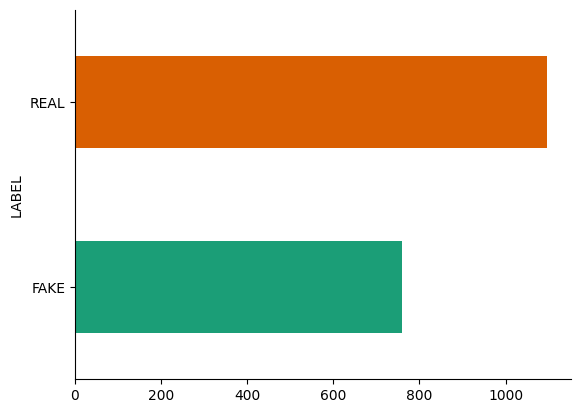

In [ ]:
fake_real_graph(df2)



In [ ]:
# Combined dataset has been Cleaned and Preprocessed.
df2.to_csv('combined_translated.csv',index = False )

# Translate MVD Dataset

In [ ]:
mvd = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Updated_MVD.csv?token=GHSAT0AAAAAACOAQOPG73KKJ7PVIRURGIAUZPURYUA')

In [ ]:
mvd

In [ ]:
df3 = dataframe_translate(mvd,['title','description'])
df3

In [ ]:
df3.to_csv('translated_mvd.csv',index = False)

# Translate BollyBait

In [ ]:
bolly = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Updated_BollyBAIT.csv?token=GHSAT0AAAAAACOAQOPGUF4XBSJABABSNU3AZPUTP4A')

In [ ]:
df4 = dataframe_translate(bolly,['title','description'])

Translating: 100%|██████████| 1686/1686 [01:57<00:00, 14.35it/s] 


In [ ]:
df4

In [ ]:
df4.to_csv('translate_bollybait.csv',index = False)

# converting text files


In [ ]:
translate_file('/content/Datasets/Combined_Comments/0LHxvxdRnYc.txt','/content/drive/MyDrive/Translated_comments/0LHxvxdRnYc.txt')

100%|██████████| 1003/1003 [00:42<00:00, 23.63it/s]

Error Occured In translate Function {RequestError()} &lt;🅣🅗🅘🅢 🅘🅢 🅐 🅕🅔🅜🅘🅝🅘🅢🅣 🅟🅡🅞🅟🅐🅖🅐🅝🅓🅐 🅕🅘🅛🅜 🅓🅔🅢🅟🅘🅣🅔 🅦🅗🅐🅣 🅣🅗🅔 🅛🅘🅐🅡🅢 🅐🅡🅔 🅢🅐🅨🅘🅝🅖. 🅨🅞🅝-🅡🅞🅖🅖 🅛🅘🅔🅢 🅣🅞 🅒🅐🅡🅞🅛 🅦🅘🅣🅗 🅟🅛🅐🅝🅢 🅣🅞 🅤🅢🅔 🅗🅔🅡, 🅦🅗🅘🅒🅗 🅟🅡🅞🅜🅞🅣🅔🅢 🅣🅗🅔 🅕🅔🅜🅘🅝🅘🅢🅣 🅑🅔🅛🅘🅔🅕 🅞🅕 🅜🅘🅢🅞🅖🅨🅝🅨. 🅒🅐🅡🅞🅛 🅗🅐🅢 🅣🅗🅔 🅑🅔🅛🅘🅔🅕 🅣🅗🅐🅣 🅐🅝🅨🅣🅗🅘🅝🅖 🅨🅞🅝-🅡🅞🅖🅖 🅒🅐🅝 🅓🅞 🅢🅗🅔 🅒🅐🅝 🅓🅞 🅑🅔🅣🅣🅔🅡. 🅑🅔🅒🅐🅤🅢🅔 🅒🅐🅡🅞🅛 🅘🅢 🅐 🅦🅞🅜🅐🅝 🅐🅝🅓 🅐🅛🅛 🅣🅗🅐🅣 🅕🅔🅜🅘🅝🅘🅢🅣 🅔🅠🅤🅐🅛🅘🅣🅨 🅝🅞🅝🅢🅔🅝🅢🅔. 🅒🅐🅡🅞🅛 🅐🅛🅢🅞 🅢🅣🅔🅐🅛🅢 🅐 🅜🅐🅝&#39;🅢 🅜🅞🅣🅞🅡🅒🅨🅒🅛🅔 🅕🅞🅡 &quot;🅞🅑🅙🅔🅒🅣🅘🅕🅨🅘🅝🅖&quot; 🅒🅐🅡🅞🅛 🅑🅨 🅢🅐🅨🅘🅝🅖 &quot;🅢🅜🅘🅛🅔 🅖🅞🅡🅖🅔🅞🅤🅢&quot;. 🅣🅗🅘🅢 🅟🅡🅞🅜🅞🅣🅔🅢 🅕🅔🅜🅘🅝🅘🅢🅣 🅘🅓🅔🅞🅛🅞🅖🅘🅔🅢 🅞🅕 🅜🅔🅝 🅞🅝🅛🅨 🅣🅡🅔🅐🅣🅘🅝🅖 🅦🅞🅜🅔🅝 🅐🅢 🅢🅔🅧 🅞🅑🅙🅔🅒🅣🅢. 🅒🅐🅡🅞🅛 🅢🅟🅔🅝🅓🅢 🅗🅔🅡 🅒🅗🅘🅛🅓🅗🅞🅞🅓 🅡🅔🅟🅔🅐🅣🅔🅓🅛🅨 🅣🅡🅨🅘🅝🅖 🅣🅞 🅞🅥🅔🅡🅒🅞🅜🅔 🅜🅐🅛🅔🅢 🅦🅗🅞 🅐🅡🅔 🅢🅤🅟🅟🅡🅔🅢🅢🅘🅝🅖 🅗🅔🅡 🅐🅝🅓 🅑🅔🅛🅘🅣🅣🅛🅘🅝🅖 🅒🅐🅡🅞🅛. 🅜🅐🅛🅔🅢 🅐🅡🅔 🅟🅡🅞🅜🅞🅣🅔🅓 🅐🅢 🅑🅔🅘🅝🅖 🅑🅤🅛🅛🅘🅔🅢 🅐🅝🅓 🅜🅘🅢🅞🅖🅨🅝🅘🅢🅣🅢 🅞🅤🅣 🅣🅞 🅞🅟🅟🅡🅔🅢🅢 🅒🅐🅡🅞🅛. 🅣🅗🅔 🅕🅘🅛🅜 🅢🅐🅨🅢 🅢🅣🅐🅝🅓 🅐🅖🅐🅘🅝🅢🅣 🅜🅘🅢🅞🅖🅨🅝🅨 🅐🅝🅓 🅔🅜🅑🅡🅐🅒🅔 🅨🅞🅤🅡 🅘🅝🅝🅔🅡 🅖🅘🅡🅛 🅟🅞🅦🅔🅡. 🅣🅗🅔 🅔🅝🅣🅘🅡🅔 🅕🅘🅛🅜 🅘🅢 🅐🅛🅢🅞 🅐🅑🅞🅤🅣 🅜🅔🅝 🅤🅢🅘🅝🅖 🅔🅜🅞🅣🅘🅞🅝🅢 🅐🅢 🅦🅔🅐🅟🅞🅝🅢 🅐🅖🅐🅘🅝🅢🅣 🅦🅞🅜🅔🅝. 🅞🅝🅒🅔 🅐🅖🅐🅘🅝 🅐 🅕🅔🅜🅘🅝🅘🅢🅣 🅑🅔🅛🅘🅔🅕 🅘🅝 🅡🅔🅟🅡🅔🅢🅢🅘🅞🅝 🅐🅝🅓 🅔🅝🅢🅛🅐🅥🅔🅜🅔🅝🅣 🅑🅨 🅣🅗🅔 🅜🅐🅚🅔-🅑🅔🅛🅘🅔🅥🅔 🅟🅐🅣🅡🅘🅐🅡🅒🅗🅨. 🅣🅗🅔🅡🅔&#39;🅢 🅐 🅟🅐🅡🅣 🅘🅝 🅣🅗🅔 🅕🅘🅛🅜 

In [42]:
directory = '/content/Datasets/Combined_Comments/'
save = '/content/drive/MyDrive/Translated_comments/'
files = os.listdir(directory)

In [43]:
Comments_log=[]

In [ ]:
import os
from concurrent.futures import ThreadPoolExecutor
import tqdm
counter = 0

# Here A thread pool is created from which we assign each thread to translate a file from the files list.

def process_file(file):
    global counter
    try:
        print(file)
        print(counter,"/1704")
        counter = counter +1
        # if not os.path.exists(save + file):
        translate_file(directory + file, save + file)

    except Exception as e:
        return f"{file}: {str(e)}"
    return None

with ThreadPoolExecutor() as executor, tqdm.tqdm(total=len(files), desc='Overall Progress') as pbar:
    results = list(executor.map(process_file, files))
    Comments_log = [result for result in results if result is not None]
    pbar.update(len(files))

Comments_log


In [50]:
# This Function finds all the filenames at the given directory which have a <error> tag in them and then returns a list.
def find_error_files(directory):
    error_files = []
    for filename in os.listdir(directory):
        try:
            with open(os.path.join(directory, filename), 'r') as f:
                for line in f:
                    if line.startswith("<error>:"):
                        error_files.append(filename)
                        break
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

    return error_files


directory = "/content/drive/MyDrive/Translated_comments/"

error_files = find_error_files(directory)

with tqdm.tqdm(total=len(error_files), desc="Finding error files") as pbar:
    for filename in error_files:
        print(filename)
        pbar.update(1)



Finding error files: 0it [00:00, ?it/s]


Here we process the error files which have got a <error> tag in them


In [ ]:
from concurrent.futures import ThreadPoolExecutor

counter = 0
def process_file(file):
    global counter
    try:
        print(file)
        print(counter,"/214")
        counter = counter +1
        # if not os.path.exists(save + file):
        translate_file(directory + file, save + file)

    except Exception as e:
        return f"{file}: {str(e)}"
    return None

with ThreadPoolExecutor() as executor, tqdm.tqdm(total=len(error_files), desc='Overall Progress') as pbar:
    results = list(executor.map(process_file, error_files))
    Comments_log = [result for result in results if result is not None]
    pbar.update(len(error_files))

Comments_log


Now we remove all the emojis from the files.

In [5]:
from cleantext import clean

def remove_emoji(text):
  return clean(text, no_emoji=True)

In [14]:
import cleantext

directory = "/content/drive/MyDrive/Translated_comments/"

for filename in tqdm(os.listdir(directory)):
  file_path = os.path.join(directory, filename)
  with open(file_path, 'r') as f:
    lines = f.readlines()

  with open(file_path, 'w', encoding='utf-8') as f:
      for line in lines:
          cleaned_line = remove_emoji(line)
          f.write(cleaned_line.strip() + '\n')

100%|█████████▉| 1081/1082 [01:25<00:00, 12.63it/s]


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Translated_comments/Translated_comments'

In [9]:
directory = "/content/drive/MyDrive/Translated_comments/"

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    with open(file_path, 'r') as f:
        lines = f.readlines()
        if len(lines) >= 2:
            print(lines[1])

8 & you can always buy an sd card for more memoryshould i upgrade from galaxy note 10 plus to s20 ultrasamsung with the galaxy s20 ultra just founded the stalkers club. loluh was i the only one that got really uncomfortable when he was spinning the phone around in his hand over the edge at <a href="">6:38</a>2020: galaxy s20 ultra2022: galaxy s20 ultra instinct2025: galaxy s20 god modei'm ready to pre-order the ultra, trading in my note 10 plus. i like the 5g speed i'm getting on my oneplus 7t 5g mclaren and i can't wait to see this massive 6.9" screen!or you could get a nice s6 or s7 and an amazing camera for photoswhen people expected for s11, samsung made s20 :di am going for the s20+ because i think after awhile with having the ultra that huge camera bump will start to annoy the heck out of me but this is making me leave my pixel to retirepeople need to stop throwing money at flagships. $1400 for a phone that will be topped in a year is stupid. at this point smart phones are commod